In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multiple Layer GRU

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True,
                         download=False, data_dir='./')
train_dataset, test_dataset = dataset['train'], dataset['test']


In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = (
    train_dataset
    .shuffle(BUFFER_SIZE)
    .padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset)))

test_dataset = (
    test_dataset
    .shuffle(BUFFER_SIZE)
    .padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset)))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 89s 228ms/step - loss: 0.4461 - accuracy: 0.7812 - val_loss: 0.3107 - val_accuracy: 0.8771
Epoch 2/10
391/391 [==============================] - 85s 217ms/step - loss: 0.2243 - accuracy: 0.9183 - val_loss: 0.2992 - val_accuracy: 0.8799
Epoch 3/10
391/391 [==============================] - 86s 220ms/step - loss: 0.1700 - accuracy: 0.9381 - val_loss: 0.3397 - val_accuracy: 0.8711
Epoch 4/10
391/391 [==============================] - 85s 218ms/step - loss: 0.1371 - accuracy: 0.9509 - val_loss: 0.3632 - val_accuracy: 0.8702
Epoch 5/10
391/391 [==============================] - 86s 220ms/step - loss: 0.1171 - accuracy: 0.9600 - val_loss: 0.4033 - val_accuracy: 0.8592
Epoch 6/10
391/391 [==============================] - 84s 216ms/step - loss: 0.0913 - accuracy: 0.9700 - val_loss: 0.5003 - val_accuracy: 0.8576
Epoch 7/10
391/391 [==============================] - 88s 225ms/step - loss: 0.0675 - accuracy: 0.9800 - val_loss: 0.5518 - val_ac

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.title(string)
    plt.show()

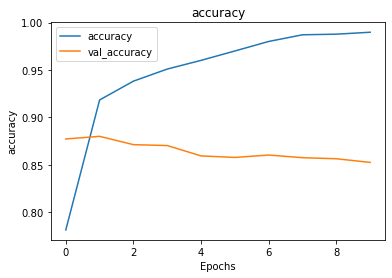

In [11]:
plot_graphs(history, 'accuracy')

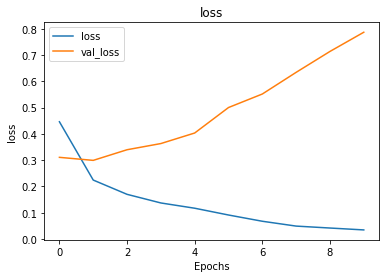

In [12]:
plot_graphs(history, 'loss')